In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
import umap 

In [20]:
dataset = pd.read_csv("sign_mnist.csv")
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [21]:
dataset_x = dataset.drop(['label'], axis = 1)
dataset_y = dataset['label']

In [22]:
scaler = StandardScaler()
dataset_x_scaled = scaler.fit_transform(dataset_x)

In [42]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(dataset_x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
u = umap.UMAP(n_neighbors=240, min_dist=0.1)
x_umap = u.fit_transform(dataset_x_scaled)


In [34]:
digits=list(dataset['label'])

In [36]:
data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'digit: {a}' for a in digits],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='Dim 1'),
                    yaxis = dict(title='Dim 2'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='umap.html')


'umap.html'

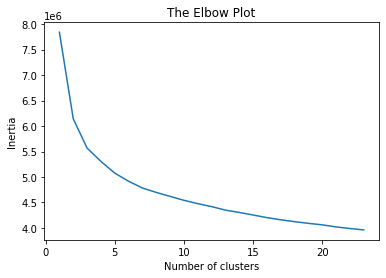

In [41]:
inertia = []
for i in range(1,24):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(dataset_x_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 24), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
